## Walds Test, Likelihood Ratio Test & McFadden's Pseudo-R2 for Logistic Regression

* Logistic Regression is extensively used for its <b>Interpretability and Probabilistic outputs</b>. In this notebook, we are going to explore significance testing for Logistic Regression framework, and understand how important and impactful features can be recognized using variouis tests. 


* In all statistical libraries, we see the summary table provided for Linear and Logistic Regression models. All of them come with multiple columns, Actual coefficients, the z/t stat associated with the coefficient, the p-value, and Standard Error term. Along with it, we also see R-squared , Log-Likelihood, F-stats and other metrics, which are essential for <b>Inference and Decision making process.</b>

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# pandas settings
pd.set_option('max_columns', None)
pd.set_option('max_rows', None)

# churn dataset
df_churn = pd.read_csv('churn_out.csv')
df_churn.head()

,product_data_storage,csat_score,articles_viewed,smartphone_notifications_viewed,marketing_emails_clicked,social_media_ads_viewed,minutes_customer_support,months_active,churned,product_travel_expense_Active,product_travel_expense_Free-Trial,product_travel_expense_No,product_payroll_Active,product_payroll_Free-Trial,product_payroll_No,product_accounting_Active,product_accounting_Free-Trial,product_accounting_No,company_size_1-10,company_size_10-50,company_size_100-250,company_size_50-100,company_size_self-employed,us_region_East North Central,us_region_East South Central,us_region_Middle Atlantic,us_region_Mountain,us_region_New England,us_region_Pacific,us_region_South Atlantic,us_region_West North Central,us_region_West South Central
0,2048,9,4,0,14,1,8.3,3.0,1.0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,2048,9,4,2,12,1,0.0,2.0,1.0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,2048,9,3,2,17,1,0.0,7.0,0.0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,500,10,0,0,14,0,0.0,8.0,1.0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0
4,5120,8,5,0,17,0,0.0,7.0,0.0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0


### Dataset 

Our Dataset: Churn data from pysurvival package

[A software as a service (SaaS) company provides a suite of products for Small-to-Medium enterprises, such as data storage, Accounting, Travel and Expenses management as well as Payroll management.So as to help the CFO forecast the acquisition and marketing costs for the next fiscal year, the Data Science team wants to build a churn model to predict when customers are likely to stop their monthly subscription. Thus, once customers have been flagged as likely to churn within a certain time window, the company could take the necessary retention actions.](!https://square.github.io/pysurvival/tutorials/churn.html)

In [2]:
# filtering on churn dataset
df_churn_ = df_churn[['product_data_storage', 'csat_score', 'articles_viewed',
       'smartphone_notifications_viewed', 'marketing_emails_clicked',
       'social_media_ads_viewed', 'minutes_customer_support', 'months_active',
       'churned']]

# splitting into independent and dependent variables
X = df_churn_.drop(['churned'], axis=1)
y = df_churn_.churned

### Observation

* We observe that there are almost equal number of people who churned and who did not, in our dataset. Looking at the summary tables below, we also see that the mean <b> product_data_storage (Amount of cloud space used in GigaBytes)</b> is lower for people who did not churn (people who left used lesser storage on average).


* We also observe that the mean <b>csat_score (Customer satisfaction score), articles viewed, marketing emails clicked clicked, social media ads viewed and months active, are lesser</b>. We also see that <b>smartphone notofications and minutes spent with customer support</b> are higher than non-churned customers. Also, churned customers have been active for lesser duration on average than non-churned customers.

In [3]:
y.value_counts()

0.0    1068
1.0     932
Name: churned, dtype: int64

In [4]:
df_churn.groupby('churned').mean()

,product_data_storage,csat_score,articles_viewed,smartphone_notifications_viewed,marketing_emails_clicked,social_media_ads_viewed,minutes_customer_support,months_active,product_travel_expense_Active,product_travel_expense_Free-Trial,product_travel_expense_No,product_payroll_Active,product_payroll_Free-Trial,product_payroll_No,product_accounting_Active,product_accounting_Free-Trial,product_accounting_No,company_size_1-10,company_size_10-50,company_size_100-250,company_size_50-100,company_size_self-employed,us_region_East North Central,us_region_East South Central,us_region_Middle Atlantic,us_region_Mountain,us_region_New England,us_region_Pacific,us_region_South Atlantic,us_region_West North Central,us_region_West South Central
churned,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1547.314607,9.388577,4.087079,0.33427,16.308052,0.439139,1.094101,4.751873,0.227528,0.769663,0.002809,0.603933,0.350187,0.045880,0.561798,0.262172,0.176030,0.162921,0.352996,0.10206,0.350187,0.031835,0.105805,0.107678,0.125468,0.117978,0.117041,0.113296,0.113296,0.101124,0.098315
1.0,1231.394850,8.507511,3.883047,0.44206,16.008584,0.310086,3.901288,2.879828,0.140558,0.843348,0.016094,0.310086,0.377682,0.312232,0.439914,0.222103,0.337983,0.152361,0.335837,0.14485,0.335837,0.031116,0.105150,0.110515,0.108369,0.116953,0.116953,0.103004,0.111588,0.116953,0.110515


### Logistic Regression Model (Predicting Churn Propensity)

In [5]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# fitting logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


LRModel = LogisticRegression(max_iter=500).fit(X_train, y_train)
y_pred = LRModel.predict(X_test)

# training and testing accuracies
accuracy_score(LRModel.predict(X_train), y_train), accuracy_score(y_pred, y_test)

(0.776, 0.757)

### Feature Contributions

* The table below contains Coefficients of all attributes along with the model intercept. We know that Logistic Regression models log of odds as linear combination of coefficients and the data. The expression can be re-written in terms of Odds, by multiplying with exponent on both sides; which provides Odds of Churning to Non-Churning.


$$log\frac{p(y)}{1-p(y)} = \beta{_0} + \beta{_1}x{_1} + \beta{_2}x{_2} + ... + \beta{_n}x{_n}$$






$$\frac{p(y)}{1-p(y)} = \exp^{\beta{_0} + \beta{_1}x{_1} + \beta{_2}x{_2} + ... + \beta{_n}x{_n}}$$


* One unit increase/ decrease of an attribute (X), leads to 'Beta' increase/ decrease in Log odds of event occurance. In terms of Odds, it is increase/ decrease of Exponent of 'Beta'. Hence, we convert Log-Odds to True-Odds by applying an exponential transformation as shown in table below.

In [6]:
df_feat = pd.DataFrame()
df_feat['features'] = ['intercept_term'] + X.columns.tolist()
df_feat['beta'] = [LRModel.intercept_] + LRModel.coef_[0].tolist()
df_feat.loc[0, 'beta'] = df_feat.iloc[0].beta[0]
df_feat['beta'] = pd.to_numeric(df_feat['beta'])
df_feat['odds'] = np.exp(df_feat.beta)
df_feat['odds'] = df_feat['odds'].astype('str')
df_feat

,features,beta,odds
0,intercept_term,11.825976,136759.05228577272
1,product_data_storage,-0.000265,0.9997354906118859
2,csat_score,-1.114814,0.3279764392254565
3,articles_viewed,-0.042609,0.958286007085567
4,smartphone_notifications_viewed,0.388169,1.4742782682460098
5,marketing_emails_clicked,-0.037101,0.9635785556193255
6,social_media_ads_viewed,-0.391455,0.6760726937037167
7,minutes_customer_support,0.089820,1.093977080726584
8,months_active,-0.275176,0.7594381755978886


## How do we reduce churn ?


### Media Targeting Strategy

* Smart phone notifications viewed have higher odds for churned vs non-churned customers, which could <b>possibly indicate unnecessary notifications popping up to customers, it could also be irrelevant notifications being displayed.</b> We could design experiments to see what the exact issue (Could be irrelevant notifications, or just the frequency of notifications). 



* Social Media Ads viewed have lower odds for chunred to non-churned, Hence, <b>we could design an experiment for re-targeting existing cutomers</b> (to either solidify belief of social presence or their usage of our tool/ product).



### Customer Satisfaction Exploration
* Customer satisfaction scores are clearly indicative of churn beahviour. Clearly, we need to dive deep into issues customers ran into and make sure they are covered (Also indicated by minutes_customer_support).

### How Strong is the evidence for the above Recommendations ?


* While interpreting results of Logistic Regression Model, understanding the confidence and stability of coefficients is important. In some cases, the coefficient contribution could be high in magnitude, but have <b>high standard errors</b> associated to it. 


* In Linear Regression, R-squared term is used to explain the amount of variance captured by regression to total amount of variance, and can be simply put into a value from 0 to 1. Similarly, we can use McFaddens Pseudo R-squared to <b>describe the quality of signal in Logistic Regression</b>.

<hr>

## McFadden's Pseudo R-Square

* Formally, McFaddens Pseudo R-square is defined as (1 - Ratio of Log-Likelihood of complete Logistic Model and Log-likelihood of only intercept term in the model). The value ranges from 0 to 1; the essence being that <b>if the model were not predictive, the LogLikelihood of Null Model and Full Model would be similar, reducing the value close to 0</b>.


* As we know the coefficients, we can calculate the Log-Likelihood of the complete model by plugging predicted class 1 probabilities into the cost function. We find the Log Likelihood for the full model to be around -488.9 manually. Below, we use statsmodels api to find out Log-Likelihood of Full model and Null model.

$$ R^2 = 1 - \frac{LL_{Full Model}}{LL_{Intercept}}$$






$$ Cost = ylog(prediction prob) + (1-y)log(1-prediction prob)$$

In [7]:
from sklearn.metrics import log_loss

def sigmoid(z):
    return 1/(1+np.exp(-z))

y_pred_proba = LRModel.predict_proba(X_train)[:,1]

LL = np.sum(y_train*np.log(y_pred_proba) + (1-y_train)*np.log(1-y_pred_proba))
LL

-488.9079452207212

In [8]:
#including intercept term
X_train['intercept_'] = 1

import statsmodels.api as sm

mod = sm.Logit(y_train, X_train)
results = mod.fit(maxiter=120)
results.summary()

Optimization terminated successfully.
         Current function value: 0.488879
         Iterations 6


/Users/aditya.kalidindi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                churned   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      991
Method:                           MLE   Df Model:                            8
Date:                Sat, 04 Apr 2020   Pseudo R-squ.:                  0.2925
Time:                        20:45:13   Log-Likelihood:                -488.88
converged:                       True   LL-Null:                       -690.97
Covariance Type:            nonrobust   LLR p-value:                 2.394e-82
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
product_data_storage               -0.0003   7.48e-05     -3.531      0.000      -0.000      -0.000
csat_score                         -1.1351      0.102    -11.132      0.000      -1.335      -0.935
articles_viewed                    -0.0441      0.040     -1.089      0.276      -0.123       0.035
smartphone_notifications_viewed     0.3978      0.137      2.894      0.004       0.128       0.667
marketing_emails_clicked           -0.0352      0.026     -1.370      0.171      -0.085       0.015
social_media_ads_viewed            -0.4051      0.151     -2.686      0.007      -0.701      -0.110
minutes_customer_support            0.0907      0.016      5.723      0.000       0.060       0.122
months_active                      -0.2757      0.041     -6.645      0.000      -0.357      -0.194
intercept_                         11.9827      1.036     11.567      0.000       9.952      14.013
===================================================================================================
"""

* We observe that LL-Null Model us -690 and LL-Full Model is -488.88 using statsmodel api (which is equal to our manual prediction step). We see from the summary table above and step below, with <b>R-squared value of 0.2925</b>. Note: [Values of 0.2 to 0.4 show excellent fit.](http://cowles.yale.edu/sites/default/files/files/pub/d04/d0474.pdf)

In [9]:
LL_null_model = -690.97
LL_full_model = -488.88

R2 = 1 - (LL_full_model/LL_null_model)
R2

0.2924729004153581

Now that we know the overall predictability power of the model with McFaddens R-squared, Lets take a look at individual attributes and their coefficients. The Z-value in statsapi model and many other software packages referrs to <b>Wald's Tests </b>

# Wald's Test

* The null hypothesis for Walds test assumes no effect of variable on Log Odds of the model, and alternate hypothesis assumes there is a siginificant effect of the attribute on the model. Walds can be defined in Chi-squared or Normal Distribution. In this case, let us stick to the normal distribution formula for Walds Stat.


* We know that the Log-Likelihood associated Logistic Regression is highest at MLE of the corresponding data and coefficients combination. Hence, on the X-axis we observe the coefficient we are testing, and y-axis is the log-likelihood associated with it.

$$ MLE = \prod_{i=1}^{n} (p)^{y}(1-p)^{1-y} = \prod_{i=1}^{n} \sigma(W^tX)^{y}(1-\sigma(W^tX))^{1-y} $$


$$ Z (Walds) =  \frac{\beta}{SE(\beta)}$$

In [10]:
smartphone_notifications_viewed_optimal = 0.388169

### Log Likelihood at Optimal Beta

* See below, we observe that at optimal beta for smartphone_notifications_viewed_optimal, is at 0.388169, with a log likelihood of -488.9079452207212.

In [11]:
# including intercept term in Coefficients

X_train['intercept_'] = 1
betas = np.array(list(LRModel.coef_[0]) + [LRModel.intercept_[0]])

y_pred_proba = sigmoid(X_train.dot(betas))
LL_optimal = np.sum(y_train*np.log(y_pred_proba) + (1-y_train)*np.log(1-y_pred_proba))
LL_optimal

/Users/aditya.kalidindi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


-488.9079452207212

### Log Likelihood for range of Beta

* Now, let us see how log-likelihood changes as we try a range of values for Beta (smartphone_notifications_viewed_optimal), with range of values on X-axis and Log-likelihood on the y-axis. We see that Log-likelihood peaks at 0.388.

In [12]:
np.arange(-3, 3, 0.1).shape

(60,)

In [13]:
LLs = []

for i in range(0,len(np.arange(-3, 3, 0.1))):
    X_train['intercept_'] = 1
    betas = np.array(list(LRModel.coef_[0]) + [LRModel.intercept_[0]])


    betas[3] = np.arange(-3, 3, 0.1)[i]
    y_pred_proba = sigmoid(X_train.dot(betas))
    LL = np.sum(y_train*np.log(y_pred_proba) + (1-y_train)*np.log(1-y_pred_proba))
    LLs.append(LL)

LLs[:10]

/Users/aditya.kalidindi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[-856.5008925854107,
 -839.0047094192732,
 -821.71758495081,
 -804.6528401921985,
 -787.8244032194461,
 -771.2467689409955,
 -754.9349539061101,
 -738.9044544100325,
 -723.1712179973542,
 -707.751638973766]

### Range of Betas vs Log-Likelihood

* From the plot below, we observe the Green line, at optimal Beta, Log-Likelihood is highest. However, the hypothesis checks if has a significant effect on Log-Odds. The difference on X-axis between the green and red lines, divided by the Standard Error of Beta, is the Wald's Z parameter.


* As the direction of green-vector shows, the more distant Optimal Beta is, higher the Z-stat (given SE is constant), as Z depends on Beta and Standard Error of Beta.

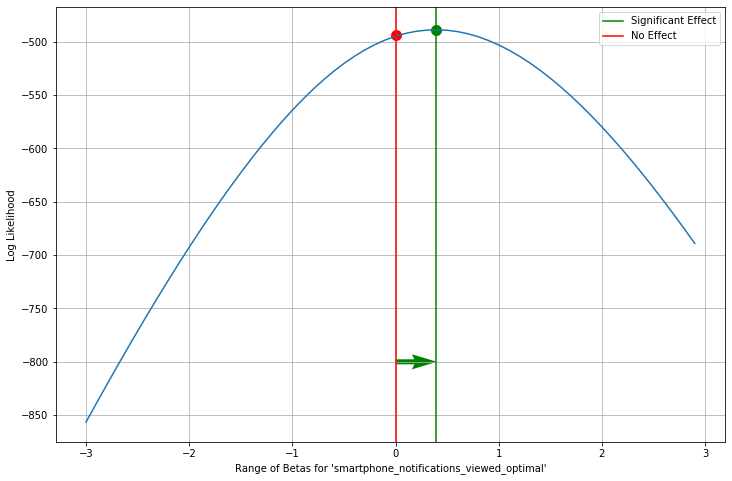

In [14]:
plt.figure(figsize=(12,8))
plt.grid()
plt.xlabel("Range of Betas for 'smartphone_notifications_viewed_optimal'")
plt.ylabel('Log Likelihood')

plt.plot(np.arange(-3, 3, 0.1), LLs)

plt.scatter(smartphone_notifications_viewed_optimal, LL_optimal, color='g', marker='o', lw=5)
plt.scatter(0, LL_optimal-5, color='r', marker='o', lw=5)

plt.axvline(x=smartphone_notifications_viewed_optimal, color='g', label='Significant Effect')
plt.axvline(x=0, color='r', label='No Effect')

origin = [0], [-800] 

plt.quiver(*origin, 1.3,0, color=['g'], scale=21)
plt.legend()

plt.show()

* Sometimes, we might observe that for a given cofficient, Log-likelihood could peak at Beta=0, signifying that the coefficient has no effect on prediction. In ther above case, it does make a significant difference (Walds Z of 2.83).

In [15]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

pred_proba = LRModel.predict_proba(X_train)
pred_proba_cls1 = pred_proba[:,1]

Source: https://web.stanford.edu/class/archive/stats/stats200/stats200.1172/Lecture26.pdf (page 2)



$$ Var(\beta) = X_TVX^{-1}$$


$$ SE(\beta) = \sqrt{Var(\beta)} $$

where X is the design matrix (Data matrix inlcuding addiitonal column for intercept), V is the p*(1-p) diagonal matrix (due to multiple binomial trails assumption)

In [16]:
# p(1-p)
mul_pred_proba = pred_proba_cls1*(1-pred_proba_cls1)

# diagnal matrix of p(1-p)
V = np.diag(mul_pred_proba)

# Design Matrix
X = np.matrix(X_train)

# Adding data for intercept term
X = np.hstack([np.ones((X.shape[0], 1)), X])

# Variance
Var = np.linalg.inv(np.dot(X.T, V).dot(X))

# diagonalizing variance
Var_diag = np.diag(Var)

# Standard Errors
SE = np.sqrt(Var_diag)

* All diagonal terms of the matrix correspond to variance and all off-diagonal are covariances. We include these into our feature summary tables below and try to understand them. We also observe that the results we obtained are consistent with the statsmodel api summary table above.


* We observe that <b>articles_viewed</b> and <b>marketing_emails_clicked</b> attributes have odds of 0.95 and 0.96 respectively, which means higher the value of articles viewed or marketing emails clicked, lower the chance of churn. However, the corresponding Walds Z values are <b>-1.05</b> and <b>-1.45</b>, which are statistically insignificant.

In [17]:
df_feat['SE'] = SE
df_feat['Walds Z'] = np.round((df_feat.beta/SE),3)
# df_feat['Walds Z'] = df_feat['Walds Z'].astype('str')

df_feat

,features,beta,odds,SE,Walds Z
0,intercept_term,11.825976,136759.05228577272,1.028866,11.494
1,product_data_storage,-0.000265,0.9997354906118859,0.000075,-3.548
2,csat_score,-1.114814,0.3279764392254565,0.101158,-11.021
3,articles_viewed,-0.042609,0.958286007085567,0.040354,-1.056
4,smartphone_notifications_viewed,0.388169,1.4742782682460098,0.136885,2.836
5,marketing_emails_clicked,-0.037101,0.9635785556193255,0.025565,-1.451
6,social_media_ads_viewed,-0.391455,0.6760726937037167,0.150134,-2.607
7,minutes_customer_support,0.089820,1.093977080726584,0.015786,5.690
8,months_active,-0.275176,0.7594381755978886,0.041341,-6.656


### Why do we need likelihood ratio test when we already have Walds Z-estimate ?

* Walds test looks for significant features, contributing to predictions. However, we could also test the hypothesis if there is a more complex decision boundary which could be captured by the data attributes. 


* Essentially, Walds and Likelihood Ratio Tests are testing for <b>different hypotheses</b>. Walds tests for how <b>further away</b> the coefficient is from (X=0), whereas Likelihood Ratio test is testing if the underlying data can find better decision boundary by including the variable vs not including the variable. 


* Using the Likelihood ratio test, we can see the direct contribution of a variable being included in a model vs not being included in the Likelihoods. Previously, Walds test was looking for <b>values further away, along the X-direction, whereas Likelihood Test is looking for gain in height (or Likelihood)</b>.

## Likelihood Ratio Test

* Below, we inlcude a new attribute for multiplying with Model intercept, called 'intercept_' and set it to 1. Function LLwithoutBeta(X_, LRModel, remove_val_ind) calculates the LL of the model after replacing the beta value by 0 for each index. 


* Hence, for each attribute, we have two models (with and without including the attribute in the model), to understand its contribution to Log-Likelihood. It can also be used as a feature selection method to see if there is a significant decrease in Log-Likelihood and then decide to inlcude the model or not.

In [18]:
betas = np.array(list(LRModel.coef_[0]) + [LRModel.intercept_[0]]).tolist()
X_ = X_train
X_['intercept_'] = 1

X_.head()

,product_data_storage,csat_score,articles_viewed,smartphone_notifications_viewed,marketing_emails_clicked,social_media_ads_viewed,minutes_customer_support,months_active,intercept_
440,2048,9,3,2,16,0,54.0,3.0,1
573,200,10,3,0,18,1,0.0,11.0,1
946,5120,10,4,0,14,1,0.0,8.0,1
997,2048,7,7,0,12,0,0.0,3.0,1
503,500,10,4,0,14,1,23.5,1.0,1


In [19]:
# function return LL
def LLwithoutBeta(X_, LRModel, remove_val_ind):
    
    # extract betas
    betas = np.array(list(LRModel.coef_[0]) + [LRModel.intercept_[0]]).tolist()
    
    # replace index with 0
    betas[remove_val_ind] = 0

    # predict_proba
    y_pred_proba = sigmoid(X_.dot(betas))
    
    # calculating LL
    LL = np.sum(y_train*np.log(y_pred_proba) + (1-y_train)*np.log(1-y_pred_proba))
    
    return LL

In [20]:
LLs = [LLwithoutBeta(X_, LRModel, val) for val in range(0,len(betas))]

LLs

[-505.919116278803,
 -5016.28958241602,
 -491.9406903918843,
 -494.98990587555096,
 -519.1709459503775,
 -494.1320766426853,
 -516.192674250097,
 -613.8030644742258,
 -5087.135941036749]

* Log-Likelihood at most optimal Betas is -488.9079452207212.

In [21]:
# including intercept term in Coefficients

X_train['intercept_'] = 1
betas = np.array(list(LRModel.coef_[0]) + [LRModel.intercept_[0]])

y_pred_proba = sigmoid(X_train.dot(betas))
LL_optimal = np.sum(y_train*np.log(y_pred_proba) + (1-y_train)*np.log(1-y_pred_proba))
LL_optimal

-488.9079452207212

### Calculating Likelihood Ratio and associated p-value

Likelihood ratio is defined as twice the ratio of LogLikelihood of full model vs LogLikelihood of model without the coefficient, and has an asymptotic Chi-Squared distribution under the null hypothesis.

$$ LR = 2(LL_{optimal} - LL_{null})$$

In [22]:
# calculating Likelihood Ratios for all coefficients
LikelihoodRatio = [np.round(2*(LL_optimal - LLs[i]),2) for i in range(0,len(betas))]
df_feat['LikelihoodRatio-t'] = LikelihoodRatio

# obtaining p-values for the Chi-squared distribution
from scipy.stats import chi2
p_LR = [np.round(1 - chi2.cdf(val,1),3) for val in LikelihoodRatio]
df_feat['p_value_LR'] = p_LR

In [36]:
df_feat

,features,beta,odds,SE,Walds Z,LikelihoodRatio-t,p_value_LR
0,intercept_term,11.825976,136759.05228577272,1.028866,11.494,34.02,0.000
1,product_data_storage,-0.000265,0.9997354906118859,0.000075,-3.548,9054.76,0.000
2,csat_score,-1.114814,0.3279764392254565,0.101158,-11.021,6.07,0.014
3,articles_viewed,-0.042609,0.958286007085567,0.040354,-1.056,12.16,0.000
4,smartphone_notifications_viewed,0.388169,1.4742782682460098,0.136885,2.836,60.53,0.000
5,marketing_emails_clicked,-0.037101,0.9635785556193255,0.025565,-1.451,10.45,0.001
6,social_media_ads_viewed,-0.391455,0.6760726937037167,0.150134,-2.607,54.57,0.000
7,minutes_customer_support,0.089820,1.093977080726584,0.015786,5.690,249.79,0.000
8,months_active,-0.275176,0.7594381755978886,0.041341,-6.656,9196.46,0.000


* Hence, we see that all features are statistically significant and contribute to increase in Log-Likelihood. Considering Walds-Z and Likelihood Ratio-t stats together provides evidence for significances of effect and increase in Loglikelihood at the same time (See that few attributes have lower Z, but high T).


* Likelihood-Ratio test can be used to decide when we want to include new features or interaction terms, and Walds Z can provide evidence of significance of coefficient to predict log-odds and interpret magnitude and direction of effect.